# About Dataset

### What is a brain tumor?
> A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

## The importance of the subject
> Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life therefore

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import datetime
import numpy as np

## Getting Data Ready

In [7]:
train_path="/content/drive/MyDrive/MRI/MRIData/Training"
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               class_names=None,
                                                               label_mode='categorical',
                                                               color_mode='rgb',
                                                               batch_size=32,
                                                               image_size=(256, 256),
                                                               shuffle=False)

Found 5722 files belonging to 4 classes.


In [8]:
test_path="/content/drive/MyDrive/MRI/MRIData/Testing"
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                               class_names=None,
                                                               label_mode='categorical',
                                                               color_mode='rgb',
                                                               batch_size=32,
                                                               image_size=(256, 256),
                                                               shuffle=False)

Found 1311 files belonging to 4 classes.


## Visualizing Train Data

In [9]:
import pandas as pd
path="/content/drive/MyDrive/MRI/MRIData/Training/"
len_data={}
for i in range(0,4):
  folder=i
  data_folder=path+train_data.class_names[i]+"/"
  for j in os.walk(data_folder):
    len_data[train_data.class_names[i]]=len(os.listdir(data_folder))

In [10]:
df=pd.DataFrame([len_data])
df

,glioma,meningioma,notumor,pituitary
0,1331,1339,1595,1457


## Data Split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


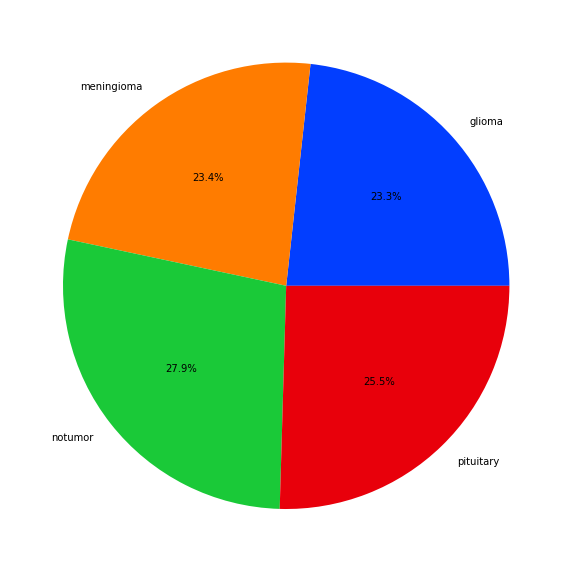

In [11]:
import seaborn as sns
plt.figure(figsize=(10,17));
palette_color = sns.color_palette('bright');
  
# plotting data on chart
plt.pie(df, labels=train_data.class_names, colors=palette_color, autopct='%1.1f%%');

## Write code that takes data path select from each folder display them

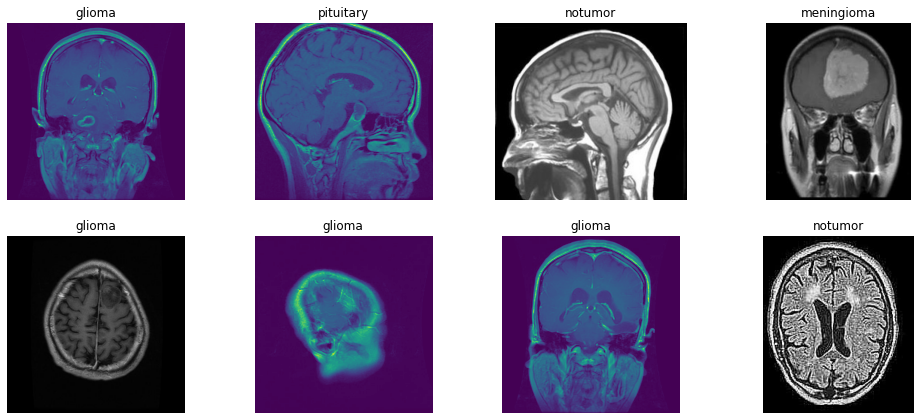

In [12]:

plt.figure(figsize=(17, 15))
for i in range(0,8):
  plt.subplot(4,4,i+1)
  random_folder=random.choice(os.listdir(train_path))
  image_folder=str(train_path+"/"+random_folder+"/")
  image=image_folder+random.choice(os.listdir(image_folder))
  image=plt.imread(image);
  plt.title(random_folder);
  plt.imshow(image);
  plt.axis(False)

## Becoming One with Data

In [ ]:
def plot_data(path,class_name):
  plt.figure(figsize=(18,18))
  for i in range(0,8):
   plt.subplot(5,4,i+1)
   image_folder=path+"/"+class_name+"/"
   image=image_folder+random.choice(os.listdir(image_folder));
   img=plt.imread(image)
   plt.imshow(img)
   plt.title(class_name)
   plt.axis(False)
   plt.suptitle(f"{class_name}", fontsize=50)

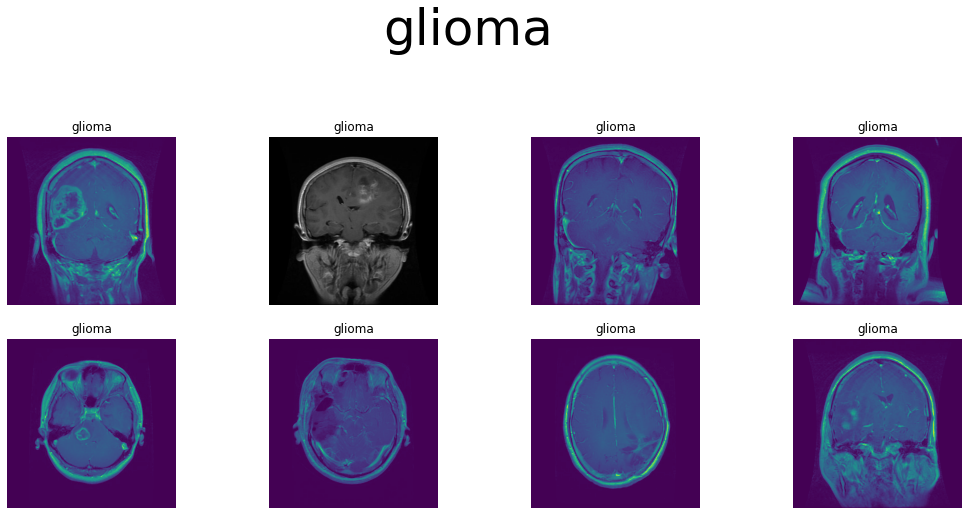

In [ ]:
plot_data(train_path,train_data.class_names[0])

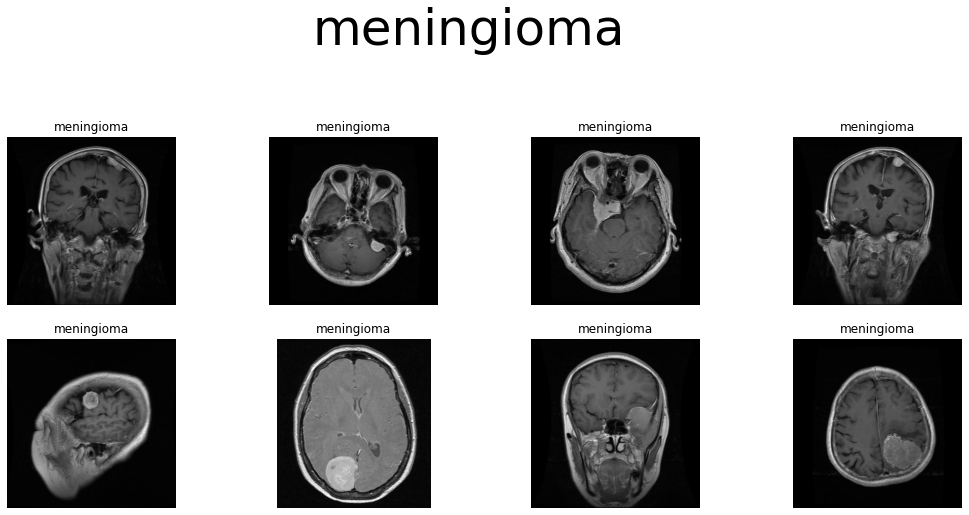

In [ ]:
plot_data(train_path,train_data.class_names[1])

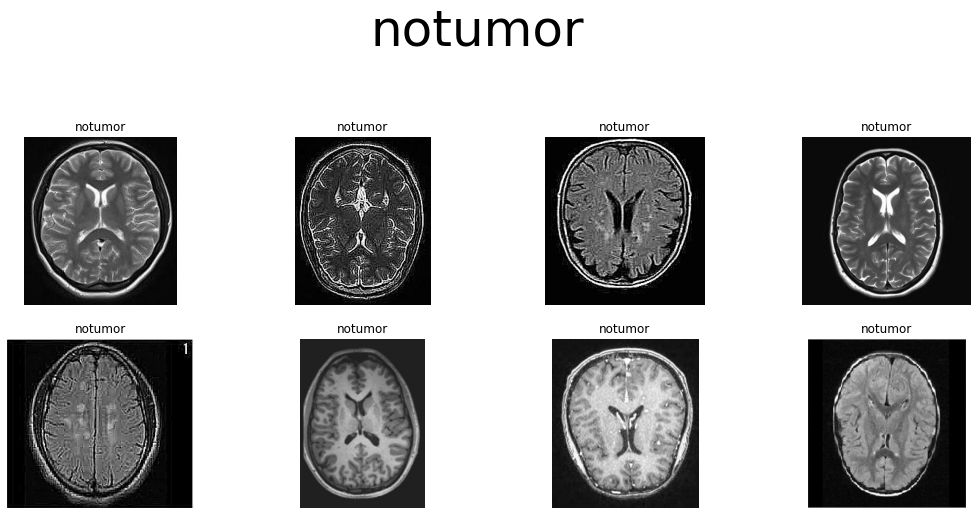

In [ ]:
plot_data(train_path,train_data.class_names[2])

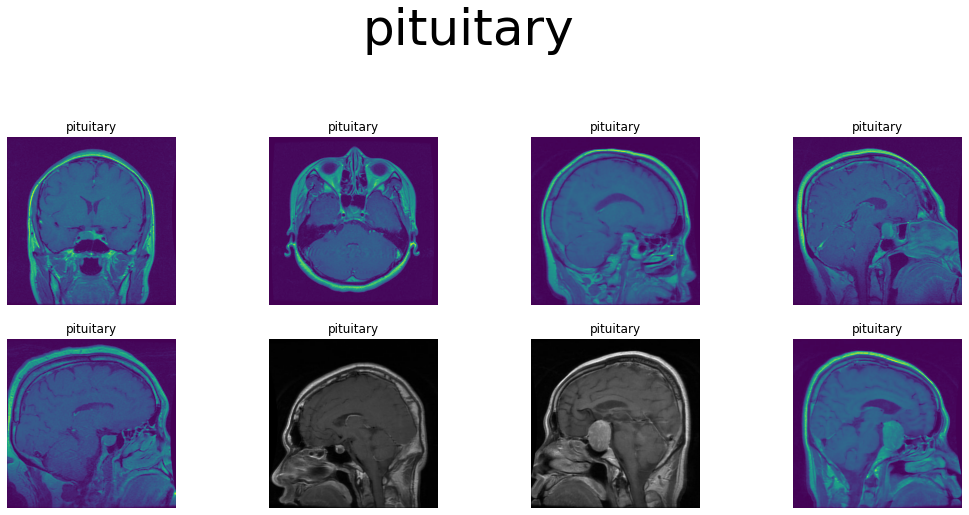

In [ ]:
plot_data(train_path,train_data.class_names[3])

## Create Model 1

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,GlobalMaxPooling2D,Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [14]:
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Create Model 1

In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256,256,3),name="Input"),
    Conv2D(filters=10,padding="valid",strides=1,kernel_size=2,activation="relu"),
    GlobalMaxPooling2D(name="PoolingLayer"),
    Dense(10,activation="relu"),
    Dense(4,activation="softmax")
])
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 255, 255, 10)      130       
                                                                 
 PoolingLayer (GlobalMaxPool  (None, 10)               0         
 ing2D)                                                          
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      callbacks=[create_tensorboard_callback("Tensoboard","DenseCNN")],
                      validation_data=test_data,validation_steps=len(test_data))

Saving TensorBoard log files to: Tensoboard/DenseCNN/20221114-180902
Epoch 1/5
179/179 [==============================] - 65s 356ms/step - loss: 26.5271 - accuracy: 0.3759 - val_loss: 7.2843 - val_accuracy: 0.2319
Epoch 2/5
179/179 [==============================] - 18s 102ms/step - loss: 1.9275 - accuracy: 0.3163 - val_loss: 1.5476 - val_accuracy: 0.2616
Epoch 3/5
179/179 [==============================] - 19s 108ms/step - loss: 1.3653 - accuracy: 0.3020 - val_loss: 1.3705 - val_accuracy: 0.2792
Epoch 4/5
179/179 [==============================] - 18s 103ms/step - loss: 1.3205 - accuracy: 0.3161 - val_loss: 1.3676 - val_accuracy: 0.2746
Epoch 5/5
179/179 [==============================] - 18s 103ms/step - loss: 1.3225 - accuracy: 0.3294 - val_loss: 1.4248 - val_accuracy: 0.2510


In [ ]:
def plot_loss_curves(history):
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

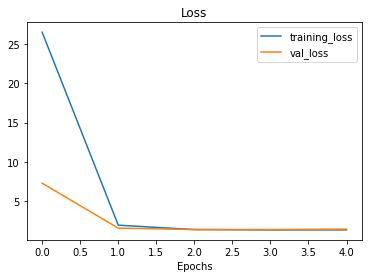

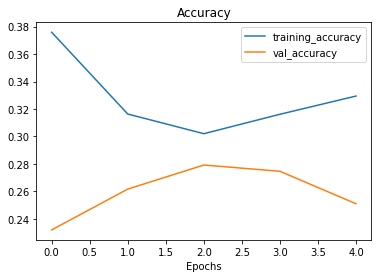

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1_preds=model_1.evaluate(test_data)
model_1_preds

41/41 [==============================] - 3s 77ms/step - loss: 1.4248 - accuracy: 0.2510


[1.4247742891311646, 0.25095346570014954]

## Model 2

In [ ]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256,256,3),name="Input"),
    Conv2D(filters=100,padding="valid",strides=1,kernel_size=2,activation="relu"),
    Conv2D(filters=50,padding="valid",strides=1,kernel_size=2,activation="relu"),
    Dense(100,activation="relu"),
    Conv2D(filters=10,padding="valid",strides=1,kernel_size=2,activation="relu"),
    Dense(100,activation="relu"),
    Conv2D(filters=2,padding="valid",strides=1,kernel_size=2,activation="relu"),
    Dense(100,activation="relu"),
    Conv2D(filters=100,padding="valid",strides=1,kernel_size=2,activation="relu"),
    GlobalMaxPooling2D(name="PoolingLayer"),
    Dense(10,activation="relu"),
    Dense(4,activation="softmax")
])
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      callbacks=[create_tensorboard_callback("Tensoboard","DenseBigCNN")],
                      validation_data=test_data,validation_steps=len(test_data))

Saving TensorBoard log files to: Tensoboard/DenseBigCNN/20221114-181127
Epoch 1/5
179/179 [==============================] - 171s 918ms/step - loss: 5.7439 - accuracy: 0.6199 - val_loss: 1.3938 - val_accuracy: 0.2288
Epoch 2/5
179/179 [==============================] - 155s 869ms/step - loss: 1.4347 - accuracy: 0.1188 - val_loss: 1.3856 - val_accuracy: 0.2288
Epoch 3/5
179/179 [==============================] - 155s 865ms/step - loss: 1.3972 - accuracy: 0.0813 - val_loss: 1.3848 - val_accuracy: 0.2288
Epoch 4/5
179/179 [==============================] - 155s 864ms/step - loss: 1.3965 - accuracy: 0.1103 - val_loss: 1.3842 - val_accuracy: 0.3089
Epoch 5/5
179/179 [==============================] - 155s 864ms/step - loss: 1.3961 - accuracy: 0.1382 - val_loss: 1.3837 - val_accuracy: 0.3089


In [ ]:
model_2_preds=model_2.evaluate(test_data)
model_2_preds

41/41 [==============================] - 11s 254ms/step - loss: 1.3837 - accuracy: 0.3089


[1.3836603164672852, 0.30892449617385864]

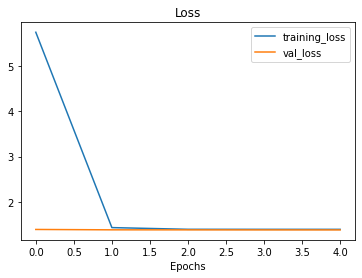

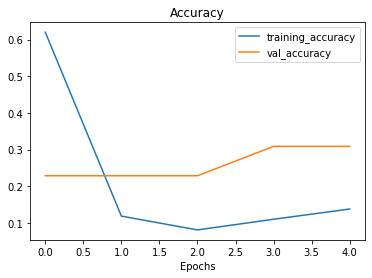

In [ ]:
plot_loss_curves(history_2)

## Model 3

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256,256,3),name="Input"),
    Conv2D(filters=100,padding="valid",strides=1,kernel_size=2,activation="relu"),
    Conv2D(filters=50,padding="valid",strides=1,kernel_size=2,activation="relu"),
    Conv2D(filters=10,padding="valid",strides=1,kernel_size=2,activation="relu"),
    Dense(10,activation="relu"),
    Flatten(),
    Dense(4,activation="softmax")
])
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_3=model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      callbacks=[create_tensorboard_callback("Tensoboard","DensemidCNN(3)")],
                      validation_data=test_data,validation_steps=len(test_data))

Saving TensorBoard log files to: Tensoboard/DensemidCNN(3)/20221114-182535
Epoch 1/5
179/179 [==============================] - 57s 311ms/step - loss: 30.2147 - accuracy: 0.8127 - val_loss: 1.3308 - val_accuracy: 0.3478
Epoch 2/5
179/179 [==============================] - 54s 304ms/step - loss: 1.5492 - accuracy: 0.4159 - val_loss: 2.2000 - val_accuracy: 0.3867
Epoch 3/5
179/179 [==============================] - 54s 304ms/step - loss: 2.3362 - accuracy: 0.6031 - val_loss: 175.6622 - val_accuracy: 0.2365
Epoch 4/5
179/179 [==============================] - 54s 303ms/step - loss: 2.1707 - accuracy: 0.4626 - val_loss: 1.2962 - val_accuracy: 0.3242
Epoch 5/5
179/179 [==============================] - 54s 304ms/step - loss: 1.2244 - accuracy: 0.4638 - val_loss: 1.0827 - val_accuracy: 0.5828


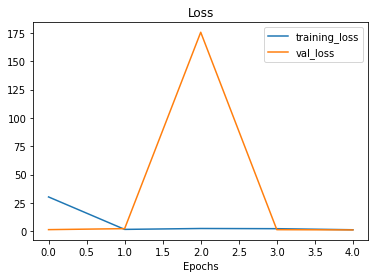

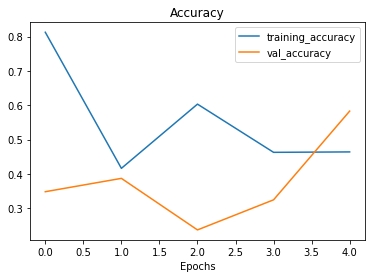

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3_preds=model_3.evaluate(test_data)

41/41 [==============================] - 4s 97ms/step - loss: 1.0827 - accuracy: 0.5828


## Model_4

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Flatten())
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 115200)           

In [ ]:
model_4_history=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      callbacks=[create_tensorboard_callback("Tensoboard","Sample")],
                      validation_data=test_data,validation_steps=int(0.15*len(test_data)))

Saving TensorBoard log files to: Tensoboard/Sample/20221114-183042
Epoch 1/5
179/179 [==============================] - 20s 108ms/step - loss: 79.6931 - accuracy: 0.7363 - val_loss: 343.6262 - val_accuracy: 0.0000e+00
Epoch 2/5
179/179 [==============================] - 18s 98ms/step - loss: 12.1330 - accuracy: 0.5266 - val_loss: 167.0057 - val_accuracy: 0.0000e+00
Epoch 3/5
179/179 [==============================] - 17s 97ms/step - loss: 3.4235 - accuracy: 0.1520 - val_loss: 14.4765 - val_accuracy: 0.0104
Epoch 4/5
179/179 [==============================] - 17s 97ms/step - loss: 2.8692 - accuracy: 0.6297 - val_loss: 72.3277 - val_accuracy: 0.0000e+00
Epoch 5/5
179/179 [==============================] - 18s 98ms/step - loss: 2.2752 - accuracy: 0.3008 - val_loss: 2.3559 - val_accuracy: 0.0000e+00


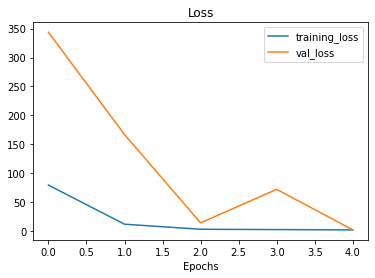

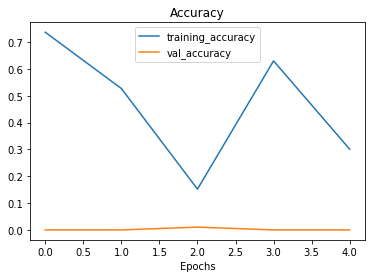

In [ ]:
plot_loss_curves(model_4_history)

In [ ]:
model_4_preds=model.evaluate(test_data)
model_4_preds

41/41 [==============================] - 4s 89ms/step - loss: 2.7899 - accuracy: 0.2540


[2.789857864379883, 0.254004567861557]

## Model_5 Using Functional Api

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(256,256,3))
x=layers.Conv2D(filters=32,kernel_size=(2,2),padding="valid",activation="relu")(inputs)
x=layers.MaxPooling2D(2,2)(x)
x=layers.Conv2D(64, (3, 3), activation='relu')(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Conv2D(32, (3, 3), activation='relu')(x)
x=layers.Flatten()(x)
x=layers.Dense(16, activation='relu')(x)
x=Dropout(0.3)(x)
x=layers.Flatten()(x)
outputs=layers.Dense(4,activation="softmax")(x)
model_5=tf.keras.Model(inputs,outputs)
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_5.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 60, 32)        18464 

In [ ]:
history_5=model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      callbacks=[create_tensorboard_callback("Tensoboard","model5")],
                      validation_data=test_data,validation_steps=len(test_data))

Saving TensorBoard log files to: Tensoboard/model5/20221114-183219
Epoch 1/5
179/179 [==============================] - 21s 113ms/step - loss: 3.1159 - accuracy: 0.3053 - val_loss: 1.3862 - val_accuracy: 0.2334
Epoch 2/5
179/179 [==============================] - 20s 112ms/step - loss: 1.3875 - accuracy: 0.1400 - val_loss: 1.3861 - val_accuracy: 0.2334
Epoch 3/5
179/179 [==============================] - 20s 112ms/step - loss: 1.3874 - accuracy: 0.1456 - val_loss: 1.3860 - val_accuracy: 0.3089
Epoch 4/5
179/179 [==============================] - 20s 111ms/step - loss: 1.3873 - accuracy: 0.1304 - val_loss: 1.3859 - val_accuracy: 0.3089
Epoch 5/5
179/179 [==============================] - 20s 112ms/step - loss: 1.3873 - accuracy: 0.1830 - val_loss: 1.3859 - val_accuracy: 0.3089


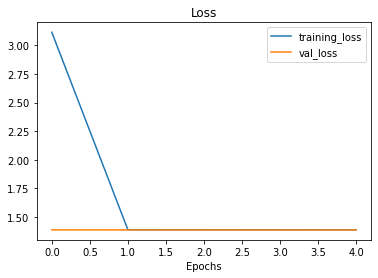

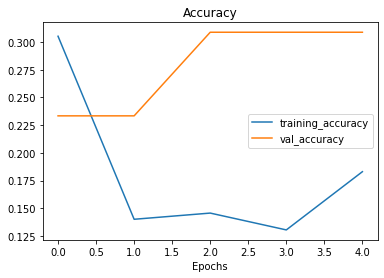

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5_preds=model_5.evaluate(test_data)

41/41 [==============================] - 3s 84ms/step - loss: 1.3859 - accuracy: 0.3089


## Create Model Checkpoint Callback

In [15]:
checkpoint_path="MRI_model_checkpoint"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True)

## Create Data Augmentation Layer

> Data Augmentation
* Random Brightness: 80% - 120%
* Random Contrast: 80% - 120%
* Random sharpness: 80% - 120%

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
data_augmentation=Sequential([
    preprocessing.RandomContrast(0.3),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2)
],name="DataAugmentation")

In [ ]:
inputs=layers.Input(shape=(256,256,3))
x=data_augmentation(inputs)
x=layers.Conv2D(filters=32,kernel_size=(2,2),padding="valid",activation="relu")(inputs)
x=layers.MaxPooling2D(2,2)(x)
x=layers.Conv2D(64, (3, 3), activation='relu')(x)
x=layers.MaxPooling2D((2, 2))(x)
x=layers.Conv2D(32, (3, 3), activation='relu')(x)
x=layers.Flatten()(x)
x=layers.Dense(16, activation='relu')(x)
x=Dropout(0.3)(x)
x=layers.Flatten()(x)
outputs=layers.Dense(4,activation="softmax")(x)
model_6=tf.keras.Model(inputs,outputs)
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.00001),
                metrics=["accuracy"])

history_6=model_6.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      callbacks=[create_tensorboard_callback("Tensoboard","model6")],
                      validation_data=test_data,validation_steps=len(test_data))

Saving TensorBoard log files to: Tensoboard/model6/20221114-183407
Epoch 1/5
179/179 [==============================] - 21s 113ms/step - loss: 8.2304 - accuracy: 0.4652 - val_loss: 1.3863 - val_accuracy: 0.3089
Epoch 2/5
179/179 [==============================] - 20s 112ms/step - loss: 1.3864 - accuracy: 0.1494 - val_loss: 1.3862 - val_accuracy: 0.3089
Epoch 3/5
179/179 [==============================] - 20s 111ms/step - loss: 1.3864 - accuracy: 0.1886 - val_loss: 1.3862 - val_accuracy: 0.3089
Epoch 4/5
179/179 [==============================] - 21s 118ms/step - loss: 1.3864 - accuracy: 0.2787 - val_loss: 1.3862 - val_accuracy: 0.3089
Epoch 5/5
179/179 [==============================] - 20s 112ms/step - loss: 1.3864 - accuracy: 0.2787 - val_loss: 1.3862 - val_accuracy: 0.3089


In [ ]:
model_6_preds=model_6.evaluate(test_data)
model_6_preds

41/41 [==============================] - 3s 81ms/step - loss: 1.3862 - accuracy: 0.3089


[1.386215329170227, 0.30892449617385864]

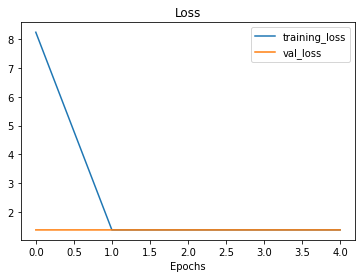

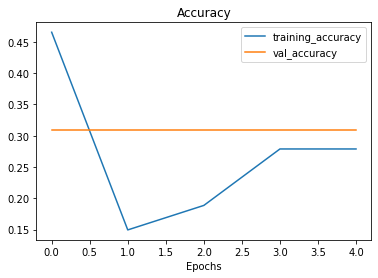

In [ ]:
plot_loss_curves(history_6)

## Create Model 7

In [19]:
model_7 = Sequential()

#layer 1
model_7.add(Conv2D(64,(7,7), input_shape=(256, 256, 3), padding='same', activation='relu'))
model_7.add(tf.keras.layers.Rescaling(scale=1/255.))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2,2)))

#layer 2
model_7.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2,2)))

#layer 3
model_7.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2,2)))

#layer 4
model_7.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2,2)))

#layer 5
model_7.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2,2)))

#layer 6
model_7.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2,2)))

#layer 7
model_7.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2,2)))

model_7.add(Flatten())

model_7.add(Dense(units= 1024, activation='relu'))
model_7.add(Dropout(0.25))
model_7.add(Dense(units=512, activation='relu'))
model_7.add(Dropout(0.25))
model_7.add(Dense(units=4, activation='softmax'))



model_7.compile(optimizer='adadelta', loss='categorical_crossentropy',
                   metrics= ['accuracy'])

model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      9472      
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     401536    
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 128)    5

## Create Early Stopping 

In [20]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,)

In [21]:
history_7=model_7.fit(train_data,epochs=40,steps_per_epoch=len(train_data),
                      callbacks=[create_tensorboard_callback("Tensoboard","Final"),checkpoint_callback,early_stopping],
                      validation_data=test_data,validation_steps=len(test_data))

Saving TensorBoard log files to: Tensoboard/Final/20221115-171257
Epoch 1/40
179/179 [==============================] - 612s 3s/step - loss: 1.2307 - accuracy: 0.5641 - val_loss: 1.4572 - val_accuracy: 0.2288
Epoch 2/40
179/179 [==============================] - 84s 469ms/step - loss: 1.0286 - accuracy: 0.6131 - val_loss: 1.5729 - val_accuracy: 0.2571
Epoch 3/40
179/179 [==============================] - 84s 469ms/step - loss: 0.8708 - accuracy: 0.6744 - val_loss: 1.8590 - val_accuracy: 0.3120
Epoch 4/40
179/179 [==============================] - 84s 470ms/step - loss: 0.7612 - accuracy: 0.7251 - val_loss: 1.7452 - val_accuracy: 0.3768
Epoch 5/40
179/179 [==============================] - 84s 469ms/step - loss: 0.6597 - accuracy: 0.7616 - val_loss: 1.6458 - val_accuracy: 0.4165
Epoch 6/40
179/179 [==============================] - 84s 468ms/step - loss: 0.5848 - accuracy: 0.7936 - val_loss: 1.5645 - val_accuracy: 0.4432
Epoch 7/40
179/179 [==============================] - 84s 467ms/st

In [22]:
model_7_preds=model_7.evaluate(test_data)

41/41 [==============================] - 5s 119ms/step - loss: 0.7728 - accuracy: 0.7162


In [23]:
model_7.save("Model_7")


In [24]:
model_7.save("model_7_final.h5")

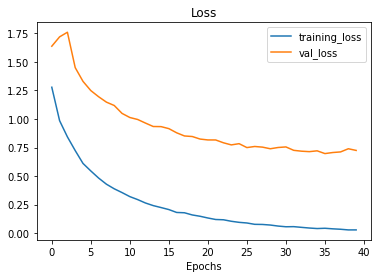

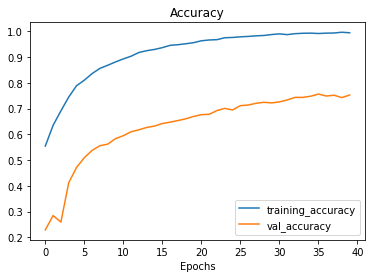

In [67]:
plot_loss_curves(history_7)

In [32]:
class_names=test_data.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

## Evaluating on Test Data

In [142]:
len(os.listdir("/content/drive/MyDrive/MRI/MRIData/Testing/glioma"))

300

In [143]:
len(os.listdir("/content/drive/MyDrive/MRI/MRIData/Testing/meningioma"))

306

In [144]:
len(os.listdir("/content/drive/MyDrive/MRI/MRIData/Testing/notumor"))

405

In [145]:
len(os.listdir("/content/drive/MyDrive/MRI/MRIData/Testing/pituitary"))

300

## Predicting Data

In [153]:
preds_probs=model_7.predict(test_data)

41/41 [==============================] - 4s 108ms/step


## Getting Insight of our prediction

In [155]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(preds_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 4
What prediction probability sample 0 looks like:
 [0.01490278 0.11975365 0.80213857 0.06320491]
The class with the highest predicted probability by the model for sample 0: 2


## Getting labels and images

In [157]:
y_labels=[]
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())


> y_label are the true label

In [159]:
len(y_labels)

1311

> pred class measn the prediction class

In [161]:
pred_classes = preds_probs.argmax(axis=1) ## Prediction Label

# How do they look?
pred_classes[:10]

array([2, 3, 1, 2, 2, 1, 0, 0, 1, 2])

## Pred Labels

In [162]:
len(pred_classes)

1311

In [169]:
from sklearn.metrics import accuracy_score
sklearn_accuracy=accuracy_score(y_labels,pred_classes)
sklearn_accuracy

0.7162471395881007

In [170]:
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

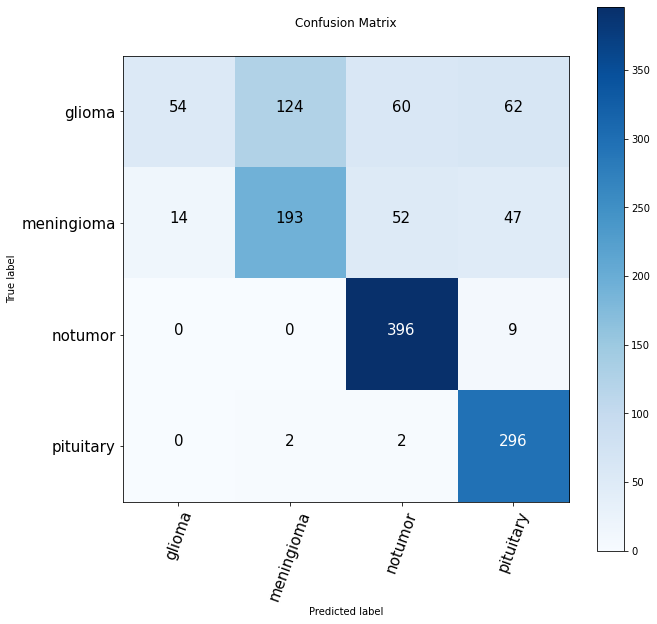

In [171]:
make_confusion_matrix(y_labels, pred_classes, classes=class_names, figsize=(10, 10), text_size=15, norm=False, savefig=False)

model is getting confuses

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.18      0.29       300
           1       0.61      0.63      0.62       306
           2       0.78      0.98      0.87       405
           3       0.71      0.99      0.83       300

    accuracy                           0.72      1311
   macro avg       0.72      0.69      0.65      1311
weighted avg       0.73      0.72      0.67      1311



In [173]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.7941176470588235,
  'recall': 0.18,
  'f1-score': 0.2934782608695652,
  'support': 300},
 '1': {'precision': 0.6050156739811913,
  'recall': 0.630718954248366,
  'f1-score': 0.6176000000000001,
  'support': 306},
 '2': {'precision': 0.7764705882352941,
  'recall': 0.9777777777777777,
  'f1-score': 0.8655737704918032,
  'support': 405},
 '3': {'precision': 0.714975845410628,
  'recall': 0.9866666666666667,
  'f1-score': 0.8291316526610644,
  'support': 300},
 'accuracy': 0.7162471395881007,
 'macro avg': {'precision': 0.7226449386714843,
  'recall': 0.6937908496732026,
  'f1-score': 0.6514459210056083,
  'support': 1311},
 'weighted avg': {'precision': 0.7264175684320168,
  'recall': 0.7162471395881007,
  'f1-score': 0.6684408475273601,
  'support': 1311}}

In [176]:
## Get F1_scores
class_f1_scores = {}
for k,v in classification_report_dict.items():

  if k=="accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v["f1-score"]


In [177]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores

,class_name,f1-score
2,notumor,0.865574
3,pituitary,0.829132
1,meningioma,0.617600
0,glioma,0.293478


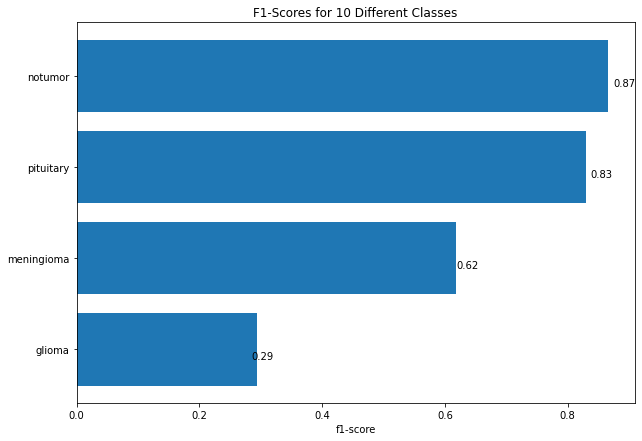

In [190]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)